# Reward map

In this Notebook we will plot the predicted movement direction (and its reward) all over the board with a "blank" model and a trained one.

## A blank model

First, lets build a game set, setting the target at the center of the board (for simplicity) and plot the "best movement" (the one with the higher reward possibility).


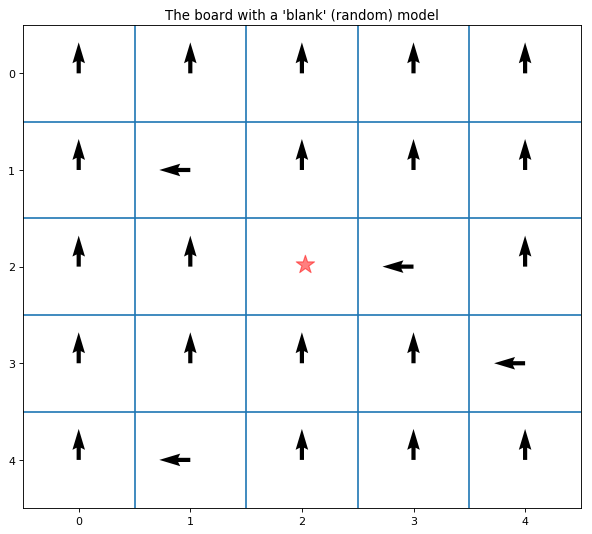

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# Add the parent dir to the system path (and import the local modules)
import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import gaming
import learning

# Load the game (5x5)
board_size = 5
the_game = gaming.SeekGame(board_size, board_size)
model = learning.ModelBuilder(width=the_game.width, height=the_game.height)

# Set the target in the center
the_game.set_target_position(2, 2)

# Arrays for the directions
X = np.zeros((board_size, board_size))
Y = np.zeros((board_size, board_size))

# Get the predicted direction at each point
for idx_x in range(0, board_size):
    for idx_y in range(0, board_size):
        
        # Skip the target point
        if (the_game.target_x == idx_x) and (the_game.target_y == idx_y):
            X[idx_x, idx_y] = None
            continue

        # set the player in the point
        the_game.set_player_position(idx_x, idx_y)
        input_t = the_game.get_board_vector()
        prediction = model.next_action(input_t)

        # Up
        if prediction == 0:
            X[idx_x, idx_y] = 1.0
        # Right
        elif prediction == 1:
            Y[idx_x, idx_y] = 1.0
        # Down
        elif prediction == 2:
            X[idx_x, idx_y] = -1.0
        # Left
        elif prediction == 3:
            Y[idx_x, idx_y] = -1.0

            
# Now lets plot the board
plt.figure(figsize=(9, 8), dpi= 80)
plt.title("The board with a 'blank' (random) model")

# Grid lines
grid_x = np.array([ -0.5, 0.5, 1.5, 2.5, 3.5 ])
grid_y = np.array([ -0.5, 0.5, 1.5, 2.5, 3.5 ])

plt.xlim(-0.5, 4.5)
plt.ylim(4.5, -0.5)
for i in range(1, 5):
    plt.axhline(y=(i-0.5))
    plt.axvline(x=(i-0.5))
plt.quiver(X, Y)

# Plot a symbol over the target
plt.plot(the_game.target_x, the_game.target_y, "ro", alpha=0.5, marker=r'$\star$', markersize=22)
            
plt.show()

## Trained model

Now let's plot the predicted movement on a fully trained model:

Model file: ../model_weights/model_weights-5x5.h5
Load weights OK


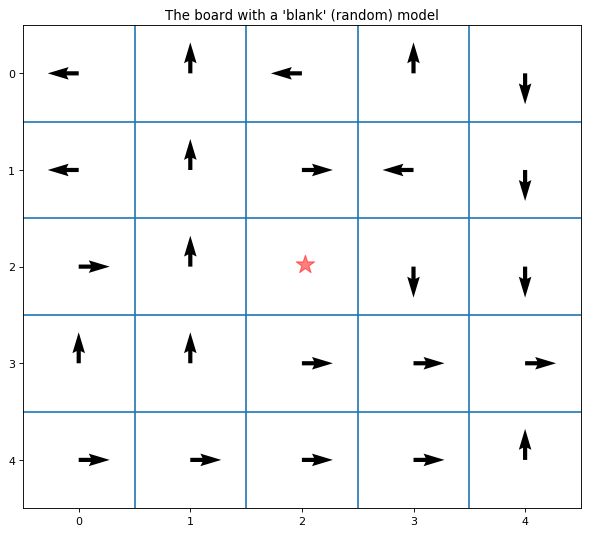

In [58]:
# %load_ext autoreload
# %autoreload 2
import importlib
importlib.reload(learning)

# Load the game (5x5)
board_size = 5
the_game = gaming.SeekGame(board_size, board_size)

model = learning.ModelBuilder(name="5x5",
                              width=the_game.width,
                              height=the_game.height,
                              weights_directory="../model_weights")

print(f"Model file: {model.model_file}")
if model.load_weights():
    print(f"Load weights OK")
else:
    print(f"Failed to load weights: this model is not trained!")

# Set the target in the center
the_game.set_target_position(2, 2)

# Arrays for the directions
X = np.zeros((board_size, board_size))
Y = np.zeros((board_size, board_size))

# Get the predicted direction at each point
for idx_x in range(0, board_size):
    for idx_y in range(0, board_size):
        
        # Skip the target point
        if (the_game.target_x == idx_x) and (the_game.target_y == idx_y):
            X[idx_x, idx_y] = None
            continue

        # set the player in the point
        the_game.set_player_position(idx_x, idx_y)
        input_t = the_game.get_board_vector()
        prediction = model.next_action(input_t)

        # Up
        if prediction == 0:
            X[idx_x, idx_y] = 1.0
        # Right
        elif prediction == 1:
            Y[idx_x, idx_y] = 1.0
        # Down
        elif prediction == 2:
            X[idx_x, idx_y] = -1.0
        # Left
        elif prediction == 3:
            Y[idx_x, idx_y] = -1.0

            
# Now lets plot the board
plt.figure(figsize=(9, 8), dpi= 80)
plt.title("The board with a 'blank' (random) model")

# Grid lines
grid_x = np.array([ -0.5, 0.5, 1.5, 2.5, 3.5 ])
grid_y = np.array([ -0.5, 0.5, 1.5, 2.5, 3.5 ])

plt.xlim(-0.5, 4.5)
plt.ylim(4.5, -0.5)
for i in range(1, 5):
    plt.axhline(y=(i-0.5))
    plt.axvline(x=(i-0.5))
plt.quiver(X, Y)

# Plot a symbol over the target
plt.plot(the_game.target_x, the_game.target_y, "ro", alpha=0.5, marker=r'$\star$', markersize=22)
            
plt.show()